# Initial Exploration
Before any preprocessing is done, the text data in its raw form can be explored to observe some featuers in raw form. Typically, the text in interest can be a single long text such as a news transcript or a colleciton of texts such as retaurant reviews or movie reviews. We will work with both the type simultaneously in this notebook.<br>
Sample1 : A news transcript taken from https://www.foxnews.com/transcript/biden-slams-texas-mississippi-for-covid-reopening-measures .<br>
Sample2 :  A set of IMDB reviews taken from http://ai.stanford.edu/~amaas/data/sentiment/


This notebook takes ideas from multiple books and articles.

### Import libraries

In [1]:
import os
import pandas as pd

In [2]:
# Read news transcription

path_to_file_1 = "../data/example_text.txt"
with open(path_to_file_1) as f:
    raw_text_1 = f.read()        # reads all the contents into a single string
                             # can read one line at a time and treat each line as separate using readlines() 


# Read Reviews       
def build_data_frame(path):
    rows = []
    index = []
    review_count = 0
    
    all_files = os.listdir(path)#os.walk(path)
    
    for filename in all_files:
        
        with open(path+filename) as f:
            raw_text = f.read()
            rows.append(raw_text)
        index.append(filename)
        review_count += 1
        
        # We will use only 300 review for simplicity for now.
        if review_count == 300:
            break
    

    data_frame = pd.DataFrame(rows, index=index)
    return data_frame

        
path_to_files_2 = "../data/imdb/train/unsup/"

reviews = build_data_frame(path_to_files_2)

### Observe the contents and impurities

Any text in it raw form contains many impurities like abbreviations, white spaces, special characters, dates, etc. This can be observed in the news transcription as well.

In [3]:
print(raw_text_1[0:500])

This is a rush transcript from "Special Report" March 3, 2021. This copy may not be in its final form and may be updated.

BRET BAIER, FOX NEWS ANCHOR (on camera): Jesse, I'm very excited about your
book now that you'll have the different kinds of dog.

WATTERS: Thank you. And if you want to send me a book, Bret on any subject,
please do, but make sure it has pictures, OK?

BAIER: OK, pictures you got it. Thank you.

Good evening. I'm Bret Baier. Breaking tonight, we are covering three big
stori


This method of reading a file is fine as long as the text file contains only ASCII characters. The character encoding for such texts is US-ASCII. However, we might encounter text files with characters from other languages that are not addressed by US-ASCII encoding e.g., UTF-8. Wikipedia says "character encoding is used to represent a repertoire of characters by some kind of encoding system that assigns a number to each character for digital representation." This has to be taken care of while reading a text file for preprocessing.

The reviews also contain impurities

In [4]:
reviews.head()

,0
0_0.txt,"I admit, the great majority of films released ..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


### Assess the lengths of the reviews. Typically, negative reviews and comments tend to be shorter. Also, longer the review, more content it has.

In [5]:
reviews.columns = ["review"]

# calculate word count for each of the reviews.
review_column = reviews["review"]
word_counts = [len(review.split(" ")) for review in review_column]

reviews["wordcount"] = word_counts

In [6]:
reviews[0:10]

,review,wordcount
0_0.txt,"I admit, the great majority of films released ...",139
10000_0.txt,"Take a low budget, inexperienced actors doubli...",154
10001_0.txt,"Everybody has seen 'Back To The Future,' right...",305
10002_0.txt,Doris Day was an icon of beauty in singing and...,125
10003_0.txt,"After a series of silly, fun-loving movies, 19...",197
10004_0.txt,"This isn't exactly a musical, but it almost se...",240
10005_0.txt,After seven years and seventeen pictures at Wa...,377
10006_0.txt,In the 1950's there were many film boigraphies...,217
10007_0.txt,MY RATING- 7.3<br /><br />This one is a curiou...,95
10008_0.txt,Doris Day and James Cagney are excellent in th...,154


We can plot the pmf for the lengths of the reviews to assess the content size.

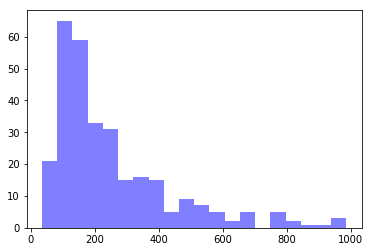

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

num_bins = 20
n, bins, patches = plt.hist(reviews["wordcount"], num_bins, facecolor='blue', alpha=0.5)
plt.show()

Similarly, several other attributes such as the average lenght of word in each review can be observed if necessary according to the problem in hand.

# Data Cleaning

Now, we move on to actual preprocessing of the text data. In this nodebook, we will cover the basic preprocessing that is done on text data before moving on to advanved preprocessing steps that require some NLP knowledge.<br>
Note that not all preprocessing steps should be done for all the use cases. These steps are subjective. For example, in sentiment analysis, a word written in uppercase could have a latent meaning (say, the character was angry and the writer intended to illustrate the character's mood) in comparison to the same word written in lowercase.

In [8]:
reviews.drop(["wordcount"], axis = 1, inplace = True)
reviews.head()

,review
0_0.txt,"I admit, the great majority of films released ..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


### Remove HTML tags
It is common among practitioners to collect text data for machine learning from the internet. As such, unwanted html tags get mixed with the content and introduce noise in the data. Before any preprocessing step is done, such unwanted tags should be removed.

In [9]:
from bs4 import BeautifulSoup

def remove_html_tags(text):
    return BeautifulSoup(text, "html.parser").get_text()

# adding an html tag for the sake of illustration
reviews.iloc[0,0] = "<html> <h1> hello </h1> </html>" + reviews.iloc[0,0] 
reviews.head()

,review
0_0.txt,"<html> <h1> hello </h1> </html>I admit, the gr..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


In [10]:
reviews["review"] = [BeautifulSoup(text).get_text() for text in reviews["review"] ]
reviews.head()

,review
0_0.txt,"hello I admit, the great majority of films ..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


### Accented Characters Removal
A lot of words in English language come from diverse backgrounds and are sometimes written in non-alphanumeric characters to preserve their origin. e.g., latté,résumé,etc. Hence, it is necessary to convert these accented characters into their English counterparts. If not done so, these characters will be lost when we remove non-alphanumeric characters down below. If these words are not preserved, they change to unwanted "words". e.g.latté becomes latt and résumé becomes rsum.

In [11]:
# adding an html tag for the sake of illustration
reviews.iloc[0,0] = "résumé " + reviews.iloc[0,0] 
reviews.head()


,review
0_0.txt,"résumé hello I admit, the great majority of..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


In [12]:
import unicodedata
def remove_accented_chars(text):
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return text

reviews["review"] = [remove_accented_chars(text) for text in reviews["review"] ]
reviews.head()

,review
0_0.txt,"resume hello I admit, the great majority of..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


As evident above, the accented characters have changed to their English counterparts.

### Lower-casing
In order to consider the words written in upper or lowercase as equivalent, all the words that contain uppercase characters should be converted into lowercase. However, this should be avoided when lower and uppercase are meanted to be considered different. e.g., to depict anger of the character

In [13]:
reviews["review_lower"] = reviews["review"].str.lower() # use panda's inbuilt method to convert each item to lowercase
reviews.head()

,review,review_lower
0_0.txt,"resume hello I admit, the great majority of...","resume hello i admit, the great majority of..."
10000_0.txt,"Take a low budget, inexperienced actors doubli...","take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right...","everybody has seen 'back to the future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...,doris day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...","after a series of silly, fun-loving movies, 19..."


### Removal of Word Contractions
In order to treat the words and their contractions as equivalent, we need to convert the contractions to their original form. Typically, contractions appear with an apostrophe. If not expanded, the apostrophe is removed when special characters are removed during preprocessing and the two forms of the same word get treated as different. e.g., "don't" and "do not". <br>
CONTRACTION_MAP taken from https://github.com/dipanjanS

In [14]:
CONTRACTION_MAP = {
"ain't": "is not",
"aren't": "are not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he would",
"he'd've": "he would have",
"he'll": "he will",
"he'll've": "he he will have",
"he's": "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how is",
"I'd": "I would",
"I'd've": "I would have",
"I'll": "I will",
"I'll've": "I will have",
"I'm": "I am",
"I've": "I have",
"i'd": "i would",
"i'd've": "i would have",
"i'll": "i will",
"i'll've": "i will have",
"i'm": "i am",
"i've": "i have",
"isn't": "is not",
"it'd": "it would",
"it'd've": "it would have",
"it'll": "it will",
"it'll've": "it will have",
"it's": "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she would",
"she'd've": "she would have",
"she'll": "she will",
"she'll've": "she will have",
"she's": "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as",
"that'd": "that would",
"that'd've": "that would have",
"that's": "that is",
"there'd": "there would",
"there'd've": "there would have",
"there's": "there is",
"they'd": "they would",
"they'd've": "they would have",
"they'll": "they will",
"they'll've": "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what will",
"what'll've": "what will have",
"what're": "what are",
"what's": "what is",
"what've": "what have",
"when's": "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where is",
"where've": "where have",
"who'll": "who will",
"who'll've": "who will have",
"who's": "who is",
"who've": "who have",
"why's": "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you would",
"you'd've": "you would have",
"you'll": "you will",
"you'll've": "you will have",
"you're": "you are",
"you've": "you have"
}

In [15]:
# from https://github.com/dipanjanS

import re # regular expression

def expand_contractions(text, contraction_mapping=CONTRACTION_MAP):
    
    contractions_pattern = re.compile('({})'.format('|'.join(contraction_mapping.keys())), 
                                      flags=re.IGNORECASE|re.DOTALL)
    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        expanded_contraction = contraction_mapping.get(match)\
                                if contraction_mapping.get(match)\
                                else contraction_mapping.get(match.lower())                       
        expanded_contraction = first_char+expanded_contraction[1:]
        return expanded_contraction
        
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text

In [16]:
reviews.drop(["review_lower"], axis = 1, inplace = True)

# adding an html tag for the sake of illustration
reviews.iloc[0,0] = "It's mine." + reviews.iloc[0,0] 
reviews.head()

,review
0_0.txt,"It's mine.resume hello I admit, the great m..."
10000_0.txt,"Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19..."


In [17]:
reviews["review_no_contractions"] = [expand_contractions(review) for review in reviews["review"]]
reviews.head()

,review,review_no_contractions
0_0.txt,"It's mine.resume hello I admit, the great m...","It is mine.resume hello I admit, the great ..."
10000_0.txt,"Take a low budget, inexperienced actors doubli...","Take a low budget, inexperienced actors doubli..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right...","Everybody has seen Back To The Future, right? ..."
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...","After a series of silly, fun-loving movies, 19..."


### Punctuation/ Special Character Removal
Punctuations and special characters typically do not add meaning to the text. e.g., The following two sentences still convey the same meaning with and wihout the ! sign. Sentence 1 : "Hurray! I won". Sentence 2 : "Hurray I won". This can be achieved in multiple ways using pandas or nltk library, or plain old python. Here we will replace every single character that is not either a lowercase or an uppercase english alphabet with a whitespace.<br>


In [18]:
reviews.drop(["review_no_contractions"], axis = 1, inplace = True)
reviews["review_no_punc_and_nums"] = reviews["review"].str.replace(pat = "[^a-zA-Z]", repl = " ")
reviews.head()

,review,review_no_punc_and_nums
0_0.txt,"It's mine.resume hello I admit, the great m...",It s mine resume hello I admit the great m...
10000_0.txt,"Take a low budget, inexperienced actors doubli...",Take a low budget inexperienced actors doubli...
10001_0.txt,"Everybody has seen 'Back To The Future,' right...",Everybody has seen Back To The Future right...
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...",After a series of silly fun loving movies ...


As seen above, the punctuations and digits in the text are removed.<br><br>
However, this should be taken with a grain of salt. Numbers can sometime be helpful in NLP. For example, im movie review, if a review contains the digit 9 somewhere, there is a good chance this reviewer gave a score of 9 and this information can be very helpful for review classification. In such cases we do not want to discard the numbers in the text. However, if the problem at hand is sentiment analysis, a number might not add much information.
 

<br>This case will be handled down below. Thus, we can choose not to remove the numbers as below.

In [19]:
reviews.drop(["review_no_punc_and_nums"], axis = 1, inplace = True)
reviews["review_no_punc"] = reviews["review"].str.replace(pat = "[^a-zA-Z0-9]", repl = " ")
reviews.head()

,review,review_no_punc
0_0.txt,"It's mine.resume hello I admit, the great m...",It s mine resume hello I admit the great m...
10000_0.txt,"Take a low budget, inexperienced actors doubli...",Take a low budget inexperienced actors doubli...
10001_0.txt,"Everybody has seen 'Back To The Future,' right...",Everybody has seen Back To The Future right...
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...",After a series of silly fun loving movies 19...


As seen above, the number 19 is well preserved in the 5th review.

Further we can choose to preserve certain characters like $ and \% and instead convert them to their text equivalents to retain their information in the text normalization step.

### Whitespace Removal
Text can contain unwanted white spaces as well. \t is a horizontal tab, \v is a vertical tab and \r is a carriage return.

In [20]:
# adding an html tag for the sake of illustration
reviews.iloc[0,0] = "Hi.\v" + reviews.iloc[0,0]
reviews.iloc[1,0] = "Hi.\t" + reviews.iloc[1,0] 
reviews.head()



,review,review_no_punc
0_0.txt,"Hi. It's mine.resume hello I admit, the gre...",It s mine resume hello I admit the great m...
10000_0.txt,"Hi.\tTake a low budget, inexperienced actors d...",Take a low budget inexperienced actors doubli...
10001_0.txt,"Everybody has seen 'Back To The Future,' right...",Everybody has seen Back To The Future right...
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...",After a series of silly fun loving movies 19...


In [21]:
# remove extra white spaces

reviews["review_no_extra_whitespace"] = [re.sub(r'[\r|\v|\t|\n|\r\n]+', ' ',review) for review in reviews["review"]]
reviews.head()

,review,review_no_punc,review_no_extra_whitespace
0_0.txt,"Hi. It's mine.resume hello I admit, the gre...",It s mine resume hello I admit the great m...,"Hi. It's mine.resume hello I admit, the gre..."
10000_0.txt,"Hi.\tTake a low budget, inexperienced actors d...",Take a low budget inexperienced actors doubli...,"Hi. Take a low budget, inexperienced actors do..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right...",Everybody has seen Back To The Future right...,"Everybody has seen 'Back To The Future,' right..."
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...,Doris Day was an icon of beauty in singing and...
10003_0.txt,"After a series of silly, fun-loving movies, 19...",After a series of silly fun loving movies 19...,"After a series of silly, fun-loving movies, 19..."


### Stop Words Removal
The words that occur frequently in sentences but do not provide additional content of their own are called stop words. e.g., "the", "very", "just", etc. These words act as noise in the data. However, there is no clear demarcation on which words should be considered stop words. Stop words can be removed by either manually creating a set of stop words and filtering them out or using a predefined set of stop words from a library such as nltk or spacy.<br>
For example, lets see what words are considered stop words in nltk library.

In [24]:
from nltk.corpus import stopwords # contains stop words for different languages

stopwords_from_nltk = set(stopwords.words("english"))
stopwords_from_nltk

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

The above cell outputs several English words that nltk considers to be stop words. e.g., 'i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you'.

In [27]:
reviews.drop(["review_no_punc"], axis = 1, inplace = True)
reviews["review_no_stop_words"] = [ " ".join([word for word in text.split() if word not in stopwords_from_nltk]) for text in reviews["review"]]
reviews.head()

,review,review_no_stop_words
0_0.txt,"It's mine.resume hello I admit, the great m...","It's mine.resume hello I admit, great majority..."
10000_0.txt,"Take a low budget, inexperienced actors doubli...","Take low budget, inexperienced actors doubling..."
10001_0.txt,"Everybody has seen 'Back To The Future,' right...","Everybody seen 'Back To The Future,' right? Wh..."
10002_0.txt,Doris Day was an icon of beauty in singing and...,Doris Day icon beauty singing acting warm voic...
10003_0.txt,"After a series of silly, fun-loving movies, 19...","After series silly, fun-loving movies, 1955 bi..."


Nonetheless, we can edit the list of stopwords as per our need and add/ remove stop words.

### Frequent/ Rare Words Removal
Stop words are the words that occur frequently in sentences of a particular language. However, there can be words that occur frequently based on the topic in context which add no additional value to the text. We can visualize the words based on their frequency of occurence in the text. Such a diagram is called a word cloud.<br>
Also, words that occur rarely can be removed if deemed necessary.

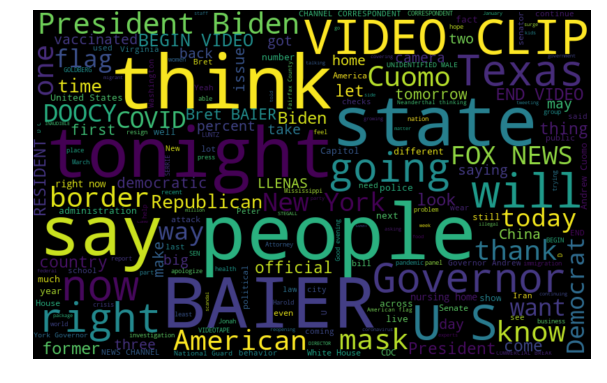

In [29]:
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=110).generate(raw_text_1)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

### Normalization
Normalization is the conversion of non-text information to textual information. e.g., $ symbol, abbreviations, numbers, dates,etc. Numbers can be treated as words and left unchanged or changed to their text equivalents. Libraries exist that can convert dates and predefined abbreviations into full text equivalents. Special characters can be removed or converted to text equivalents based on the need.<br>
normalise libraries exists for this purpose in python.

In [57]:
reviews.iloc[0,0]

'The 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatThe 3rd of Jan., 2017 was a good day. W.W.F. decided thatHi.\x0bHi.\x0bIt\'s mine.resume   hello  I admit, the great majority of films released before say 1933 are just not for me. Of the dozen or so "major" silents I have viewed, one I loved (The Crowd), and two were very good (The Last Command and City Lights, that latter Chaplin circa 1931).So I was apprehensive about this one, and humor is often difficult to appreciate (uh, enjoy) decades later. I did like the lead actors, but 

In [58]:
nltk.download('brown')
nltk.download('averaged_perceptron_tagger')
from normalise import normalise
# adding an html tag for the sake of illustration
reviews.iloc[0,0] = "The 3rd of Jan., 2017 was a good day. W.W.F. decided that" + reviews.iloc[0,0] 
reviews.head()

custom_abbr = {
    "W.W.F." : "World Wildlife Fund",
    "WWI" : "World War I"
}

normalized_tokens = normalise(reviews.iloc[0,0], user_abbrevs =custom_abbr, verbose=False)



display(f"Normalized text: {' '.join(normalized_tokens)}")

[nltk_data] Downloading package brown to
[nltk_data]     C:\Users\Being_Aerys\AppData\Roaming\nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Being_Aerys\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


'Normalized text: The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided that The third of January , twenty seventeen was a good day World Wildlife Fund decided   hello I admit , t

When the text data passes through all these steps, now it is ready to move on to the steps of tokenization, lemmatization, and stemming. These will be covered in another notebook.